# Statistik Austria - Energy Example

In [32]:
from IPython.core.interactiveshell import InteractiveShell
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from datetime import datetime
%matplotlib inline


# show full output

InteractiveShell.ast_node_interactivity = "all"


#### First data import testing


In [33]:
# df1_raw = pd.read_excel(
#     "../../data/statistik_austria/energy/jahresdurchschnittspreise_und_-steuern_2013_fuer_die_wichtigsten_energietr.xlsx",
#     header=None,
#     na_values="n.v.")
# df1_raw.head()
# df1_raw.tail()
# df1_raw.info()
# df1_raw.index
# df1_raw.columns

# remove wrong index form first xslx line
# df1 = df1_raw.drop([0, 1,17])
# df1 = df1.reset_index(drop=True)
# header = list(df1_raw.loc[1])
# header[0] = "Energietraeger"
# df1.columns = header
# df1["Jahr"] = 2013
# df1.head()


## Data Import, Cleaning, Concatination

In [34]:
# Data cleaning function

header = ['Energietraeger',
          'Nettopreis',
          'Energiesteuern und -abgaben',
          'MWSt',
          'Steuern insgesamt',
          'Bruttopreis']


def clean_dataframe(df_raw, year: int):
    df_clean = df_raw.drop([0, 1, 20])
    df_clean = df_clean.reset_index(drop=True)
    df_clean.columns = header
    df_clean["Jahr"] = year
    return df_clean


In [35]:
# Data import from folder

directory = "../../data/statistik_austria/energy"
dataframes = {}

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)

    if os.path.isfile(f):
        year = f[-40:-36]

        df = pd.read_excel(f, header=None)
        df = clean_dataframe(df, year)
        df.name = year

        dataframes[year] = df

df_list = list(dataframes.values())
df_names = list(dataframes.keys())


# Multiindex concatination and column names
df = pd.concat(df_list, axis=1, keys=df_names)
df.columns.names = ["Jahr", "Info"]
df.head()
# df.index
# df.columns
# df.dtypes


# df2 = pd.concat(df_list, axis=0, keys=df_names)
# df2.columns.names = ["Blub"]
# df2.head()
# df2.index
# df2.columns
# df2.dtypes

# df.tail()
# df.info()
# df.index.name = "idx"
# df.index
# df.columns


2014                                          \
                  Energietraeger  Nettopreis Energiesteuern und -abgaben   
0  Heizöl schwer (Industrie)/t1)    472.7875                        67.7   
1   Heizöl schwer (Kraftwerke)/t  340.286991                         7.7   
2       Gasöl (Industrie)/1000 l  510.016467                      109.18   
3     Gasöl (Haushalte)/1000 l1)      634.02                      109.18   
4       Diesel (komm. Einsatz)/l    0.540401                    0.409585   

                                                                        2017  \
     MWSt Steuern insgesamt Bruttopreis  Jahr                 Energietraeger   
0       0              67.7    540.4875  2014  Heizöl schwer (Industrie)/t1)   
1       0               7.7  347.986991  2014   Heizöl schwer (Kraftwerke)/t   
2       0            109.18  619.196468  2014       Gasöl (Industrie)/1000 l   
3  148.64            257.82      891.84  2014     Gasöl (Haushalte)/1000 l1)   
4       0          0.409585    0.949986  2014       Diesel (komm. Einsatz)/l   

                                           ...              2012              \
   Nettopreis Energiesteuern und -abgaben  ... Steuern insgesamt Bruttopreis   
0      321.04                        67.7  ...              67.7   641.44975   
1  120.042254                         7.7  ...               7.7  500.804256   
2  408.741955                      109.18  ...            109.18      680.04   
3  462.537361                      109.18  ...            275.82    999.8375   
4    0.447073                     0.40964  ...          0.436795       0.975   

                                  2018              \
   Jahr                 Energietraeger  Nettopreis   
0  2012  Heizöl schwer (Industrie)/t1)   386.44175   
1  2012   Heizöl schwer (Kraftwerke)/t  246.076435   
2  2012       Gasöl (Industrie)/1000 l  462.541266   
3  2012     Gasöl (Haushalte)/1000 l1)  562.087228   
4  2012       Diesel (komm. Einsatz)/l    0.497007   

                                                                               
  Energiesteuern und -abgaben        MWSt Steuern insgesamt Bruttopreis  Jahr  
0                        67.7           0              67.7   454.14175  2018  
1                         7.7           0               7.7  253.776435  2018  
2                      109.18           0            109.18  571.721266  2018  
3                      109.18  134.253446        243.433446  805.518173  2018  
4                     0.40964           0           0.40964    0.906647  2018  

[5 rows x 91 columns]

## Data Analysis


### Strompreis

In [36]:
# df["2013"].loc[df["2013"]["Energietraeger"] == "Gasöl (Haushalte)/1000 l1)"]
# df[("2013", "Energietraeger")]

df.head()
df.index
# df["2013"][["Energietraeger", "Nettopreis", "Jahr"]]

strom = df.xs(key="Nettopreis", axis=1, level="Info").loc[17]
type(strom)
# df.xs(key="Nettopreis", axis=1, level="Info")
strom = strom.sort_index(ascending=True)



2014                                          \
                  Energietraeger  Nettopreis Energiesteuern und -abgaben   
0  Heizöl schwer (Industrie)/t1)    472.7875                        67.7   
1   Heizöl schwer (Kraftwerke)/t  340.286991                         7.7   
2       Gasöl (Industrie)/1000 l  510.016467                      109.18   
3     Gasöl (Haushalte)/1000 l1)      634.02                      109.18   
4       Diesel (komm. Einsatz)/l    0.540401                    0.409585   

                                                                        2017  \
     MWSt Steuern insgesamt Bruttopreis  Jahr                 Energietraeger   
0       0              67.7    540.4875  2014  Heizöl schwer (Industrie)/t1)   
1       0               7.7  347.986991  2014   Heizöl schwer (Kraftwerke)/t   
2       0            109.18  619.196468  2014       Gasöl (Industrie)/1000 l   
3  148.64            257.82      891.84  2014     Gasöl (Haushalte)/1000 l1)   
4       0          0.409585    0.949986  2014       Diesel (komm. Einsatz)/l   

                                           ...              2012              \
   Nettopreis Energiesteuern und -abgaben  ... Steuern insgesamt Bruttopreis   
0      321.04                        67.7  ...              67.7   641.44975   
1  120.042254                         7.7  ...               7.7  500.804256   
2  408.741955                      109.18  ...            109.18      680.04   
3  462.537361                      109.18  ...            275.82    999.8375   
4    0.447073                     0.40964  ...          0.436795       0.975   

                                  2018              \
   Jahr                 Energietraeger  Nettopreis   
0  2012  Heizöl schwer (Industrie)/t1)   386.44175   
1  2012   Heizöl schwer (Kraftwerke)/t  246.076435   
2  2012       Gasöl (Industrie)/1000 l  462.541266   
3  2012     Gasöl (Haushalte)/1000 l1)  562.087228   
4  2012       Diesel (komm. Einsatz)/l    0.497007   

                                                                               
  Energiesteuern und -abgaben        MWSt Steuern insgesamt Bruttopreis  Jahr  
0                        67.7           0              67.7   454.14175  2018  
1                         7.7           0               7.7  253.776435  2018  
2                      109.18           0            109.18  571.721266  2018  
3                      109.18  134.253446        243.433446  805.518173  2018  
4                     0.40964           0           0.40964    0.906647  2018  

[5 rows x 91 columns]

RangeIndex(start=0, stop=18, step=1)

KeyError: 'Level Info not found'

<AxesSubplot:title={'center':'Strompreis (Netto)'}, xlabel='Jahr', ylabel='Kosten (€)'>

Text(0.5, 1.0, 'Strompreis (Netto)')

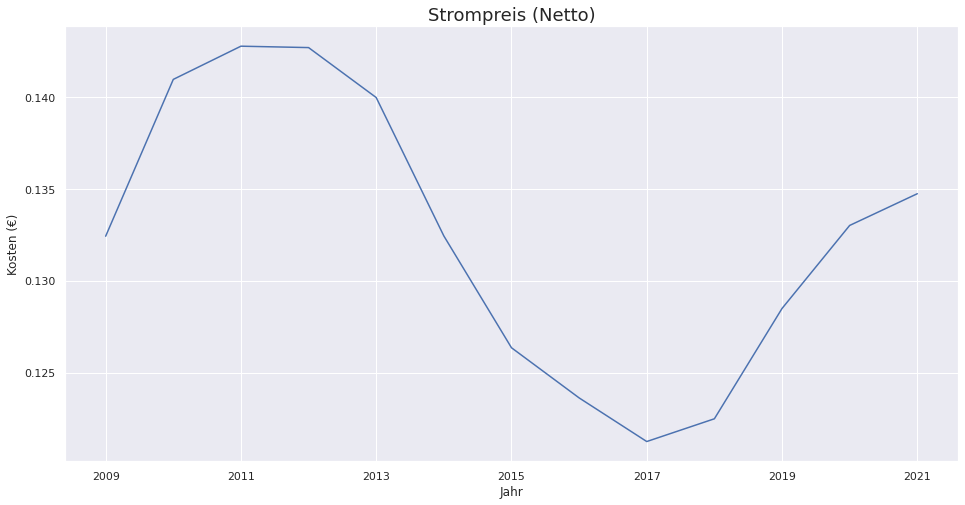

In [ ]:
# strom
# strom.info()
# strom.describe()
# strom.mean()
# strom.max()
strom.plot(kind='line', figsize=(16, 8), grid=True, xlabel='Jahr',
           ylabel='Kosten (€)', title='Strompreis (Netto)')

plt.title('Strompreis (Netto)', fontsize=18)



In [ ]:
strom.pct_change()

Jahr
2009         NaN
2010    0.064418
2011    0.012813
2012   -0.000532
2013   -0.019043
2014   -0.053786
2015   -0.045917
2016   -0.021590
2017   -0.019201
2018    0.010206
2019    0.048978
2020    0.035153
2021    0.012976
Name: 17, dtype: float64

Index(['Nettopreis'], dtype='object', name='info')

Index(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object', name='Jahr')

<bound method NDFrame.head of info Nettopreis  Nettopreisänderung %
Jahr                                 
2009    0.13242                   NaN
2010    0.14095              0.064418
2011   0.142756              0.012813
2012    0.14268             -0.000532
2013   0.139963             -0.019043
2014   0.132435             -0.053786
2015   0.126354             -0.045917
2016   0.123626             -0.021590
2017   0.121252             -0.019201
2018    0.12249              0.010206
2019   0.128489              0.048978
2020   0.133006              0.035153
2021   0.134732              0.012976>

<AxesSubplot:xlabel='Jahr'>

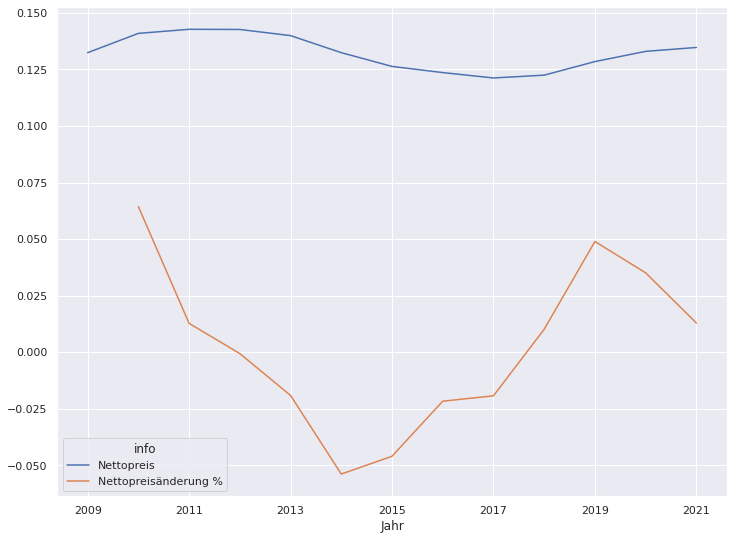

In [ ]:
strom_df = strom.to_frame()
strom_df.rename(columns={17: "Nettopreis"}, inplace=True)
strom_df.columns.name = "info"
strom_df.columns
strom_df.index

strom_df["Nettopreisänderung %"] = strom.pct_change()
strom_df.head

strom_df.plot(figsize=(12,9))

In [ ]:
strom

Jahr
2009     0.13242
2010     0.14095
2011    0.142756
2012     0.14268
2013    0.139963
2014    0.132435
2015    0.126354
2016    0.123626
2017    0.121252
2018     0.12249
2019    0.128489
2020    0.133006
2021    0.134732
Name: 17, dtype: object